<a href="https://colab.research.google.com/github/IsuruKasun/ML_Project_-Identifying_Age-Related_Conditions/blob/main/ML_Project__Identifying_Age_Related_Conditions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal is to predict if a person has any of three medical conditions,and predicting if the person has one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0).

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

# **Data Preparation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
directory_Path = '/content/drive/MyDrive/ML_Project_ Identifying_Age-Related_Conditions'

Mounted at /content/drive


In [ ]:
train             = pd.read_csv('/content/drive/MyDrive/ML_Project_ Identifying_Age-Related_Conditions/train.csv')
test             = pd.read_csv('/content/drive/MyDrive/ML_Project_ Identifying_Age-Related_Conditions/test.csv')
greeks            = pd.read_csv('/content/drive/MyDrive/ML_Project_ Identifying_Age-Related_Conditions/greeks.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/ML_Project_ Identifying_Age-Related_Conditions/sample_submission.csv')

In [ ]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [ ]:
train.shape

(617, 58)

In [ ]:
# check missing or null values
train.isnull().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [48]:
new_df = train.dropna()

In [49]:

new_df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.462860,3502.844518,118.817523,37.971167,10.196422,5.379830,0.062971,10.828981,8.718112,5382.822970,...,4.604619,3.746416,0.423671,20.552888,132.944954,15973.953703,31.364689,52.767917,9.448235,0.186131
std,0.395050,2281.427013,134.529098,68.540076,10.898788,2.506650,0.442135,4.408974,69.114063,3165.156480,...,9.095599,53.199582,1.376450,10.072061,151.520840,20083.928101,9.879365,37.285570,10.476576,0.389568
min,0.085460,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.874248,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.246766,2198.933605,85.200147,12.030297,8.138688,4.066281,0.025578,8.532908,1.229900,4161.104110,...,0.173229,0.552957,0.067730,14.020440,72.611063,3247.748035,25.033958,23.279172,0.150069,0.000000
50%,0.341840,3090.383560,85.200147,20.135146,8.138688,4.947752,0.025578,10.681890,1.229900,4992.779215,...,2.151784,1.157970,0.250601,18.650510,72.611063,8762.168480,30.519642,43.785085,0.594000,0.000000
75%,0.552285,4367.771182,107.739039,37.083478,8.138688,6.183582,0.037910,13.185360,5.390476,6020.698707,...,6.050474,1.506550,0.523214,25.064239,125.135266,21747.642820,36.822086,70.791728,21.978000,0.000000
max,4.435374,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [50]:

new_df.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [ ]:
new_df.corr()

In [46]:
# plot the same thing in order to heat map to get more acurate plots
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-52-2b2b32c4eb02>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = new_df.corr()


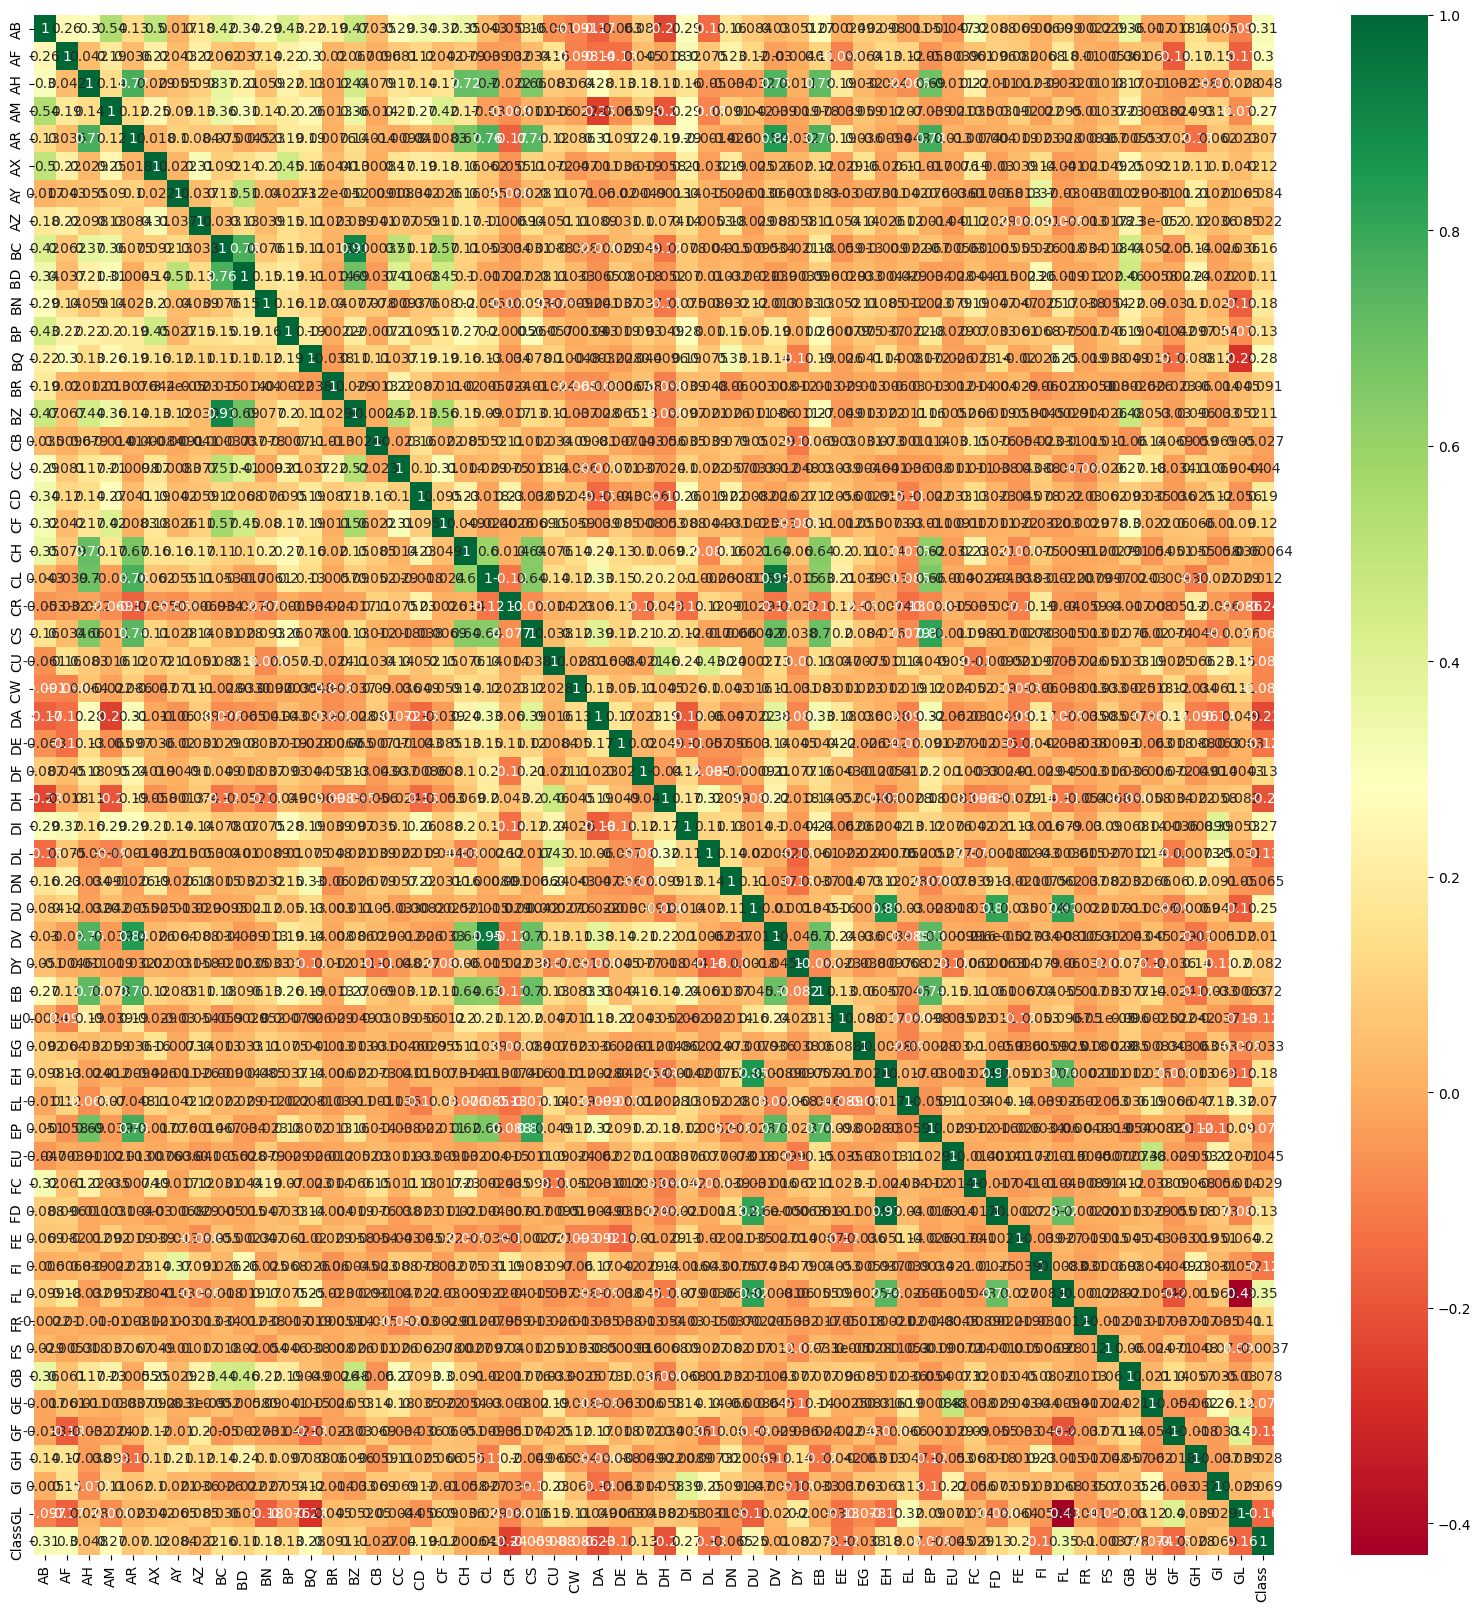

In [52]:
import seaborn as sns

corrmat = new_df.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))
#plot the heat map
g=sns.heatmap(new_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
# grean = highly corelated
# red = negarively corelated
# The annot=True parameter adds the values of the correlation coefficients to the heatmap, and the cmap="RdYlGn" parameter sets the color map for the heatmap.


In [53]:
new_dataset = new_df.drop('EJ', axis=1)
new_dataset.head


<bound method NDFrame.head of                Id        AB          AF          AH          AM         AR  \
0    000ff2bfdfe9  0.209377  3109.03329   85.200147   22.394407   8.138688   
1    007255e47698  0.145282   978.76416   85.200147   36.968889   8.138688   
2    013f2bd269f5  0.470030  2635.10654   85.200147   32.360553   8.138688   
3    043ac50845d5  0.252107  3819.65177  120.201618   77.112203   8.138688   
4    044fb8a146ec  0.380297  3733.04844   85.200147   14.103738   8.138688   
..            ...       ...         ...         ...         ...        ...   
611  fd1dd68d51b4  0.175193  2607.26686   85.200147    7.067354   8.138688   
612  fd3dafe738fd  0.149555  3130.05946  123.763599    9.513984  13.020852   
613  fd895603f071  0.435846  5462.03438   85.200147   46.551007  15.973224   
614  fd8ef6377f76  0.427300  2459.10720  130.138587   55.355778  10.005552   
616  ffcca4ded3bb  0.482849  2672.53426  546.663930  112.006102   8.138688   

           AX        AY         A

In [54]:
X = new_dataset.iloc[:, 1:-1]
X.head

<bound method NDFrame.head of            AB          AF          AH          AM         AR        AX  \
0    0.209377  3109.03329   85.200147   22.394407   8.138688  0.699861   
1    0.145282   978.76416   85.200147   36.968889   8.138688  3.632190   
2    0.470030  2635.10654   85.200147   32.360553   8.138688  6.732840   
3    0.252107  3819.65177  120.201618   77.112203   8.138688  3.685344   
4    0.380297  3733.04844   85.200147   14.103738   8.138688  3.942255   
..        ...         ...         ...         ...        ...       ...   
611  0.175193  2607.26686   85.200147    7.067354   8.138688  4.030845   
612  0.149555  3130.05946  123.763599    9.513984  13.020852  3.499305   
613  0.435846  5462.03438   85.200147   46.551007  15.973224  5.979825   
614  0.427300  2459.10720  130.138587   55.355778  10.005552  8.070549   
616  0.482849  2672.53426  546.663930  112.006102   8.138688  3.198099   

           AY         AZ          BC         BD   ...         FI         FL  \
0 

In [55]:
Y = new_dataset.iloc[:,-1]
Y.head

<bound method NDFrame.head of 0      1
1      0
2      0
3      0
4      1
      ..
611    0
612    0
613    0
614    0
616    0
Name: Class, Length: 548, dtype: int64>

In [56]:
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees Regressor algorithm from the scikit-learn library to train a machine learning model for regression analysis.
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [57]:
print(model.feature_importances_)

[0.03658954 0.02016908 0.00690829 0.02476746 0.00826528 0.0094236
 0.00550681 0.00398193 0.02595799 0.00680873 0.00664772 0.00713632
 0.03291175 0.01457049 0.00615382 0.0107632  0.01389028 0.01206936
 0.00581391 0.01020559 0.00604091 0.04280816 0.00733971 0.0106014
 0.00755428 0.05611508 0.01743132 0.01123569 0.01482861 0.04041487
 0.01549026 0.0121391  0.11512707 0.00881888 0.016429   0.00944688
 0.0176343  0.01104309 0.02658355 0.01445195 0.01407029 0.00790435
 0.0079006  0.01223029 0.02190438 0.02838286 0.07561064 0.02678566
 0.00577766 0.00926713 0.01159959 0.0081764  0.01212268 0.0057366
 0.02245562]


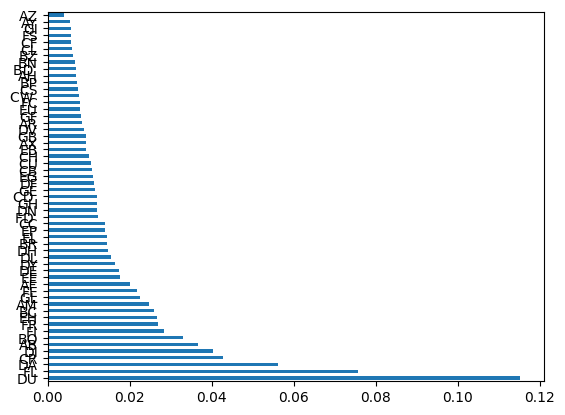

In [60]:
# plot the importance of features
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(55).plot(kind='barh')
plt.show()
# DU has more importantce

# **Model Training**

In [ ]:
import sklearn
